# Find whether a user buys a product by clicking the ad

In [1]:
# Import useful python modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, neighbors
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics

In [2]:
# Importing the dataset
dataset = pd.read_csv("Social_Network_Ads.csv")
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
# Print variable information on dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
# slicing it into idependent and dependent varibales
x = dataset.iloc[:,[1,2,3]].values
y = dataset.iloc[:,-1].values

In [5]:
x

array([['Male', 19, 19000],
       ['Male', 35, 20000],
       ['Female', 26, 43000],
       ...,
       ['Female', 50, 20000],
       ['Male', 36, 33000],
       ['Female', 49, 36000]], dtype=object)

In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

#### Changing categorical column "gender" to numerical column using LabelEncoder

In [7]:
# import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder function
le = LabelEncoder()

# fit and encode the feature which of object type
x[:,0] = le.fit_transform(x[:,0])

In [8]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

# Splitting into train and test data:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [9]:
# import StandardScaler
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
sc = StandardScaler()

# fit sc on xtrain
xtrain = sc.fit_transform(xtrain)

# transforming scaling on xtest
xtest = sc.transform(xtest)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNeighborsClassifier with n_neighbors as 5, metric as "minkowski", and p as 2
classifier = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)

# Fit classifier on training data
classifier.fit(xtrain, ytrain)

KNeighborsClassifier()

In [11]:
# preddiction on xtest
ypred = classifier.predict(xtest)

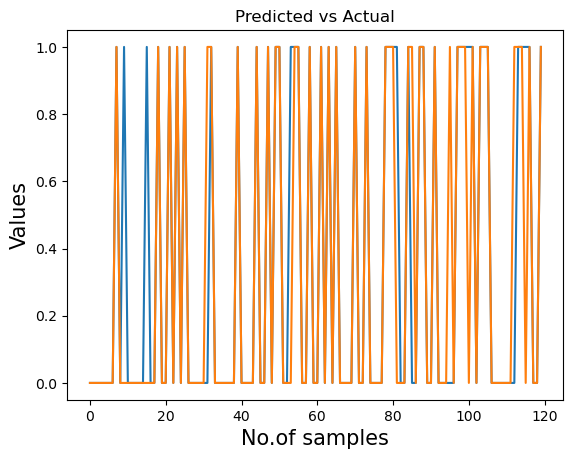

In [12]:
# Comparing true and predicted value using plot
plt.plot(ypred)
plt.plot(ytest) 
plt.title("Predicted vs Actual") 
plt.xlabel('No.of samples', fontsize=15) 
plt.ylabel('Values', fontsize=15) 
plt.show()

## Evaluation of the classification metrics

In [13]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)

cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)
ac=accuracy_score(ytest,ypred)

print(f'{cm}\n {cr}\n Accuracy{ac}')

[[73  6]
 [ 4 37]]
               precision    recall  f1-score   support

           0       0.95      0.92      0.94        79
           1       0.86      0.90      0.88        41

    accuracy                           0.92       120
   macro avg       0.90      0.91      0.91       120
weighted avg       0.92      0.92      0.92       120

 Accuracy0.9166666666666666


### To enhance the accuracy we need to loacte K to the most precised level.

In [14]:
# try K=1 through K=25 and record testing accuracy 
k_range = range(1, 26)

# empty list to append scores
scores = []

# loop through k_range 
for k in k_range:

    #Initiate KNN with n_neighbors as k 
    knn = neighbors.KNeighborsClassifier (n_neighbors=k)

    #Fitting model on training data
    knn. fit(xtrain,ytrain)

    #Predict on X_test
    ypred = knn.predict(xtest)

    # We append the scores in the dictionary in list 
    scores.append(metrics.accuracy_score(ytest, ypred))
    
# print scores
print(scores)

[0.9083333333333333, 0.875, 0.925, 0.9083333333333333, 0.9166666666666666, 0.925, 0.9166666666666666, 0.925, 0.9166666666666666, 0.925, 0.9166666666666666, 0.9166666666666666, 0.9166666666666666, 0.9166666666666666, 0.9166666666666666, 0.9166666666666666, 0.9166666666666666, 0.9166666666666666, 0.9166666666666666, 0.9083333333333333, 0.9166666666666666, 0.8833333333333333, 0.8916666666666667, 0.8916666666666667, 0.8916666666666667]


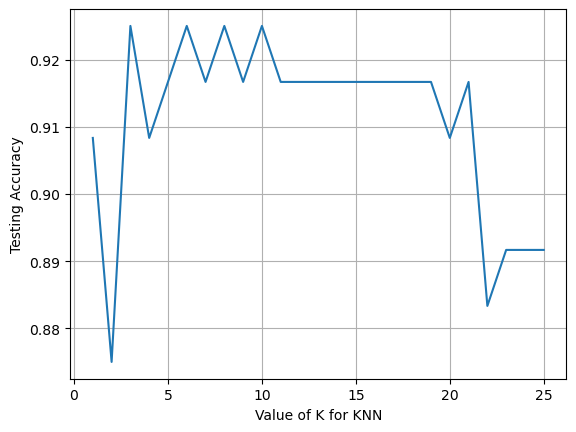

In [15]:
# plot the relationship between K and testing accuracy 
plt.plot(k_range, scores) 
plt.xlabel('Value of K for KNN') 
plt.ylabel('Testing Accuracy')
plt.grid()
plt.show()

# Summary
1.The k-nearest neighbors (KNN) algorithm is a simple, supervised machine learning algorithm that can be used to solve both classification and regression problems.

2.It's easy to implement and understand, but has a major drawback of becoming significantly slows as the size of that data in use grows.

3.In the case of classification and regression, we saw that choosing the right K for our data is done by trying several Ks and picking the one that works best. Finally, we looked at an example of how the KNN algorithm could be used in recommender systems, an application of KNN-search.

# Conclusion.

1 K Nearest Neighbor (KNN) is a very simple, easy-to-understand, and versatile machine learning algorithm.

2.It's used in many different areas, such as handwriting detection, image recognition, and video recognition.

3.KNN is most useful when labeled data is too expensive or impossible to obtain, and it can achieve high accuracy in a wide variety of prediction-type problems

4. KNN is a simple algorithm, based on the local minimum of the target function which is used to learn an unknown function of desired precision and accuracy.